# Trying to make side-by-side figures for paper

### Add paths to run locally or off NIRD

In [1]:
import sys
# Add common resources folder to path
sys.path.append("/mnt/mcc-ns9600k/jonahks/git_repos/netcdf_analysis/Common/")
sys.path.append("/mnt/mcc-ns9600k/jonahks/git_repos/netcdf_analysis/")
sys.path.append("/home/jonahks/git_repos/netcdf_analysis/")
sys.path.append("/home/jonahks/git_repos/netcdf_analysis/Common/")

from imports import (
    pd, np, xr, mpl, plt, sns, os, 
    datetime, sys, crt, gridspec,
    ccrs, metrics, Iterable
    )

from functions import (
    masked_average, add_weights, sp_map,
    season_mean, get_dpm, leap_year, share_ylims,
    to_png
    )

from classes import SatComp_Metric, CT_SLF_Metric
from collections import deque
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Check running location and adjust working directory appropriately.

In [2]:
host = os.uname()[1]
if 'jupyter' in host.split('-'): # Check if running on NIRD through the Jupyter Hub
    print('Running through MC2 Jupyter Hub')
    model_dir = '/mnt/mcc-ns9600k/jonahks/'
    os.chdir(model_dir)

else:  # Assume that we're running on a local machine and mounting NIRD
    print('Running on %s, attempting to mount ns9600k/jonahks/ from NIRD' % str(host))
    os.system('fusermount -zu ~/drivemount/')  # unmount first
    os.system('sshfs jonahks@login.nird.sigma2.no:"p/jonahks/" ~/drivemount/')    # Calling mountnird from .bashrc doesn't work
    os.chdir('/home/jonahks/drivemount/')
    save_dir = '~/DATAOUT/'
    save_to = os.path.expanduser(save_dir)

output_dir = 'figures/'
case_dir = 'satcomp/'   # inconsistent label compared to jupy_test
conv_dir ='convectivephase/'

# Check that each important directory can be accessed:    
access_paths = os.path.exists(output_dir) and os.path.exists(case_dir) and os.path.exists(conv_dir)
print('Can access all directory paths:', access_paths)

Running through MC2 Jupyter Hub
Can access all directory paths: True


## Quick function for muting the existing labels

In [3]:
def mute_ax(ax):
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_title('')

## Load metrics

All cases (CAM6 maybe)

In [21]:
allmetric = SatComp_Metric(case_dir)

allmetric.add_case('20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1', label="CAM6-Oslo")
allmetric.add_case('CESM2_slfvars', label="CAM6")
allmetric.add_case('20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1', label="CAM6-OsloIce")

allmetric.add_case("20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10",label='CAM6-Oslo \n Fit 1')
allmetric.add_case('20200629_morn_cam61satcomp_wbf_0.5_inp_0.05',label='CAM6-OsloIce \n Fit 2')
allmetric.add_case('20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1',label='CAM6-OsloIce \n Fit 3')
allmetric.add_case('20200713_CESM2_satcomp_wbf_1_inp_100',label="CAM6 Fit")

Loading GOCCP data...done.
Loading CALIOP SLFs...done
Loading CERES-EBAF fluxes...done.
Trying to load concatenated file for 20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1
20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1 load successfully.
Trying to load concatenated file for CESM2_slfvars
CESM2_slfvars load successfully.
Trying to load concatenated file for 20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1
20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1 load successfully.
Trying to load concatenated file for 20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10
20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10 load successfully.
Trying to load concatenated file for 20200629_morn_cam61satcomp_wbf_0.5_inp_0.05
20200629_morn_cam61satcomp_wbf_0.5_inp_0.05 load successfully.
Trying to load concatenated file for 20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1
20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1 load successfully.
Trying to load

In [9]:
allmetric_slf = CT_SLF_Metric(case_dir)

allmetric_slf.add_case('20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1', label="CAM6-Oslo")
allmetric_slf.add_case('CESM2_slfvars', label="CAM6")
allmetric_slf.add_case('20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1', label="CAM6-OsloIce")

allmetric_slf.add_case("20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10",label='CAM6-Oslo \n Fit 1')
allmetric_slf.add_case('20200629_morn_cam61satcomp_wbf_0.5_inp_0.05',label='CAM6-OsloIce \n Fit 2')
allmetric_slf.add_case('20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1',label='CAM6-OsloIce \n Fit 3')
allmetric_slf.add_case('20200713_CESM2_satcomp_wbf_1_inp_100',label="CAM6 Fit")

Trying to load concatenated file for 20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1
Trying to load concatenated file for CESM2_slfvars


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Trying to load concatenated file for 20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1
Trying to load concatenated file for 20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Trying to load concatenated file for 20200629_morn_cam61satcomp_wbf_0.5_inp_0.05
Trying to load concatenated file for 20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Trying to load concatenated file for 20200713_CESM2_satcomp_wbf_1_inp_100


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [14]:
to_png(forlegend,"all_legend")

Base models (CAM6-Oslo, CAM6, CAM6-OsloIce)

In [32]:
basemetric = SatComp_Metric(case_dir)
# mainmetric.add_case('20200327_132118_singleparam_noresm2satcomp_wbf_1_inp_1') # origin point

basemetric.add_case('20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1', label="CAM6-Oslo")
basemetric.add_case('CESM2_slfvars', label="CAM6")
basemetric.add_case('20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1', label="CAM6-OsloIce")

Loading GOCCP data...done.
Loading CALIOP SLFs...done
Loading CERES-EBAF fluxes...done.
Trying to load concatenated file for 20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1
20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1 load successfully.
Trying to load concatenated file for CESM2_slfvars
CESM2_slfvars load successfully.
Trying to load concatenated file for 20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1
20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1 load successfully.


In [3]:
basemetric_slf = CT_SLF_Metric(case_dir)

basemetric_slf.add_case('20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1', label="CAM6-Oslo")
basemetric_slf.add_case('CESM2_slfvars', label="CAM6")
basemetric_slf.add_case('20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1', label="CAM6-OsloIce")

Trying to load concatenated file for 20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Trying to load concatenated file for CESM2_slfvars
Trying to load concatenated file for 20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Fitted models

In [141]:
fitmetric = SatComp_Metric(case_dir)

fitmetric.add_case("20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10",label='CAM6-Oslo \n Fit 1')
# fitmetric.add_case('20200414_205148_singleparam_cam61satcomp_wbf_1_inp_0.05',label='CAM6-OsloIce \n Fit 2')
fitmetric.add_case('20200629_morn_cam61satcomp_wbf_0.5_inp_0.05',label='CAM6-OsloIce \n Fit 2')
fitmetric.add_case('20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1',label='CAM6-OsloIce \n Fit 3')
fitmetric.add_case('20200713_CESM2_satcomp_wbf_1_inp_100',label="CAM6 Fit")

Loading GOCCP data...done.
Loading CALIOP SLFs...done
Loading CERES-EBAF fluxes...done.
Trying to load concatenated file for 20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10
20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10 load successfully.
Trying to load concatenated file for 20200629_morn_cam61satcomp_wbf_0.5_inp_0.05
20200629_morn_cam61satcomp_wbf_0.5_inp_0.05 load successfully.
Trying to load concatenated file for 20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1
20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1 load successfully.
Trying to load concatenated file for 20200713_CESM2_satcomp_wbf_1_inp_100
20200713_CESM2_satcomp_wbf_1_inp_100 load successfully.


In [4]:
fitmetric_slf = CT_SLF_Metric(case_dir)

fitmetric_slf.add_case("20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10",label='CAM6-Oslo Fit 1')
fitmetric_slf.add_case('20200629_morn_cam61satcomp_wbf_0.5_inp_0.05',label='CAM6-OsloIce Fit 2')
# fitmetric_slf.add_case('20200414_205148_singleparam_cam61satcomp_wbf_1_inp_0.05',label='CAM6-OsloIce Fit 2')
fitmetric_slf.add_case('20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1',label='CAM6-OsloIce Fit 3')
# fitmetric_slf.add_case('CESM2_fittest',path='mnth15runs/')
fitmetric_slf.add_case('20200713_CESM2_satcomp_wbf_1_inp_100',label="CAM6 Fit")

Trying to load concatenated file for 20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Trying to load concatenated file for 20200629_morn_cam61satcomp_wbf_0.5_inp_0.05
Trying to load concatenated file for 20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Trying to load concatenated file for 20200713_CESM2_satcomp_wbf_1_inp_100


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


## Figure making

Text(0.55,0.42,'d.')

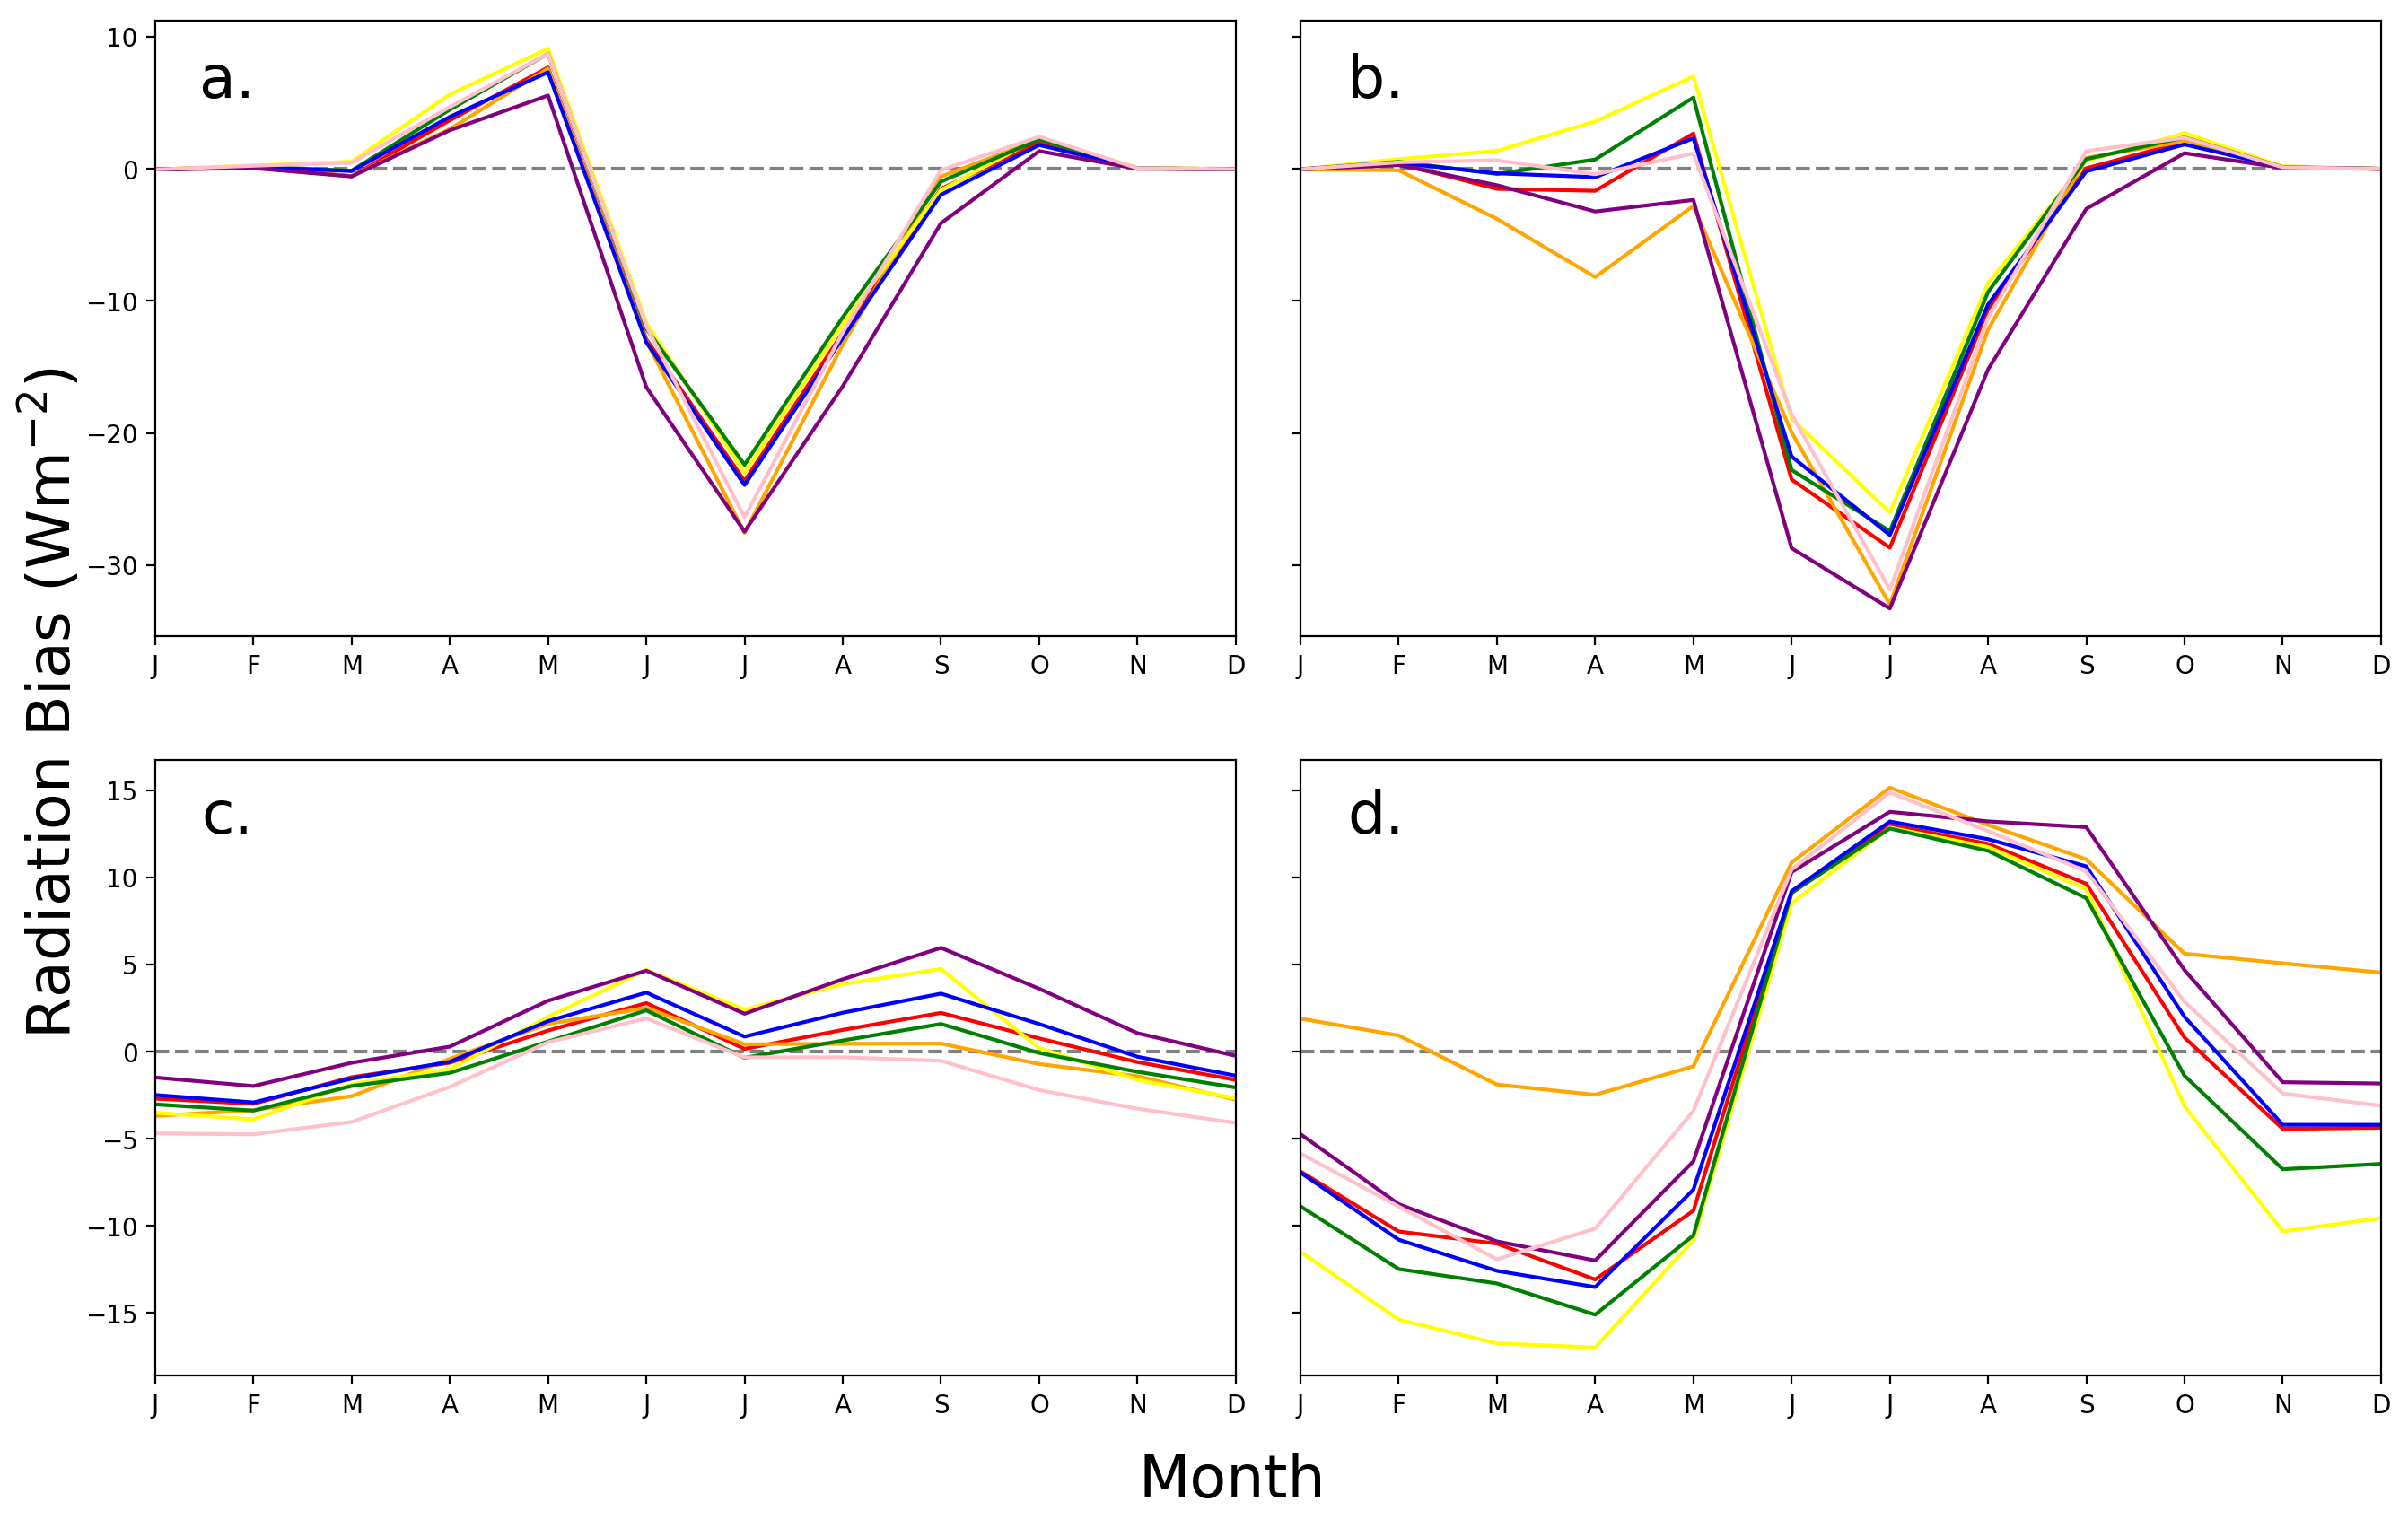

In [53]:
fig,axs = plt.subplots(nrows=2,ncols=2,sharey='row')
fig.set_figheight(10)
fig.set_figwidth(16)
fig.set_dpi(200)

axs = axs.flat
fig.subplots_adjust(wspace=0.06)

allmetric.plot_months_line('SWCF',ax=axs[0], bias=True)
allmetric.plot_months_line('FSDS',ax=axs[1], bias=True)
allmetric.plot_months_line('LWCF',ax=axs[2], bias=True)
allmetric.plot_months_line('FLDS',ax=axs[3], bias=True)


# Mute existing labels and draw zero lines
for i in axs:
    mute_ax(i)
    i.hlines(0,1,12, linestyle='dashed',color='gray')
    i.set_xlim(1,12)

# axs[1].set_yticklabels([])

# Trying Latex formatting
# plt.rc('text', usetex=False)
# plt.rc('font', family='serif')

# Re-label
fig.text(0.1, 0.5, r'Radiation Bias (Wm$^{-2}$)', va='bottom', ha='center', rotation='vertical', 
         rotation_mode='anchor', fontsize=24)
fig.text(0.5, 0.05, 'Month', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)

fig.text(0.15, 0.83, 'a.', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)
fig.text(0.55, 0.83, 'b.', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)
fig.text(0.15, 0.42, 'c.', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)
fig.text(0.55, 0.42, 'd.', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)

In [55]:
to_png(fig,'surface_and_cloud_biases')

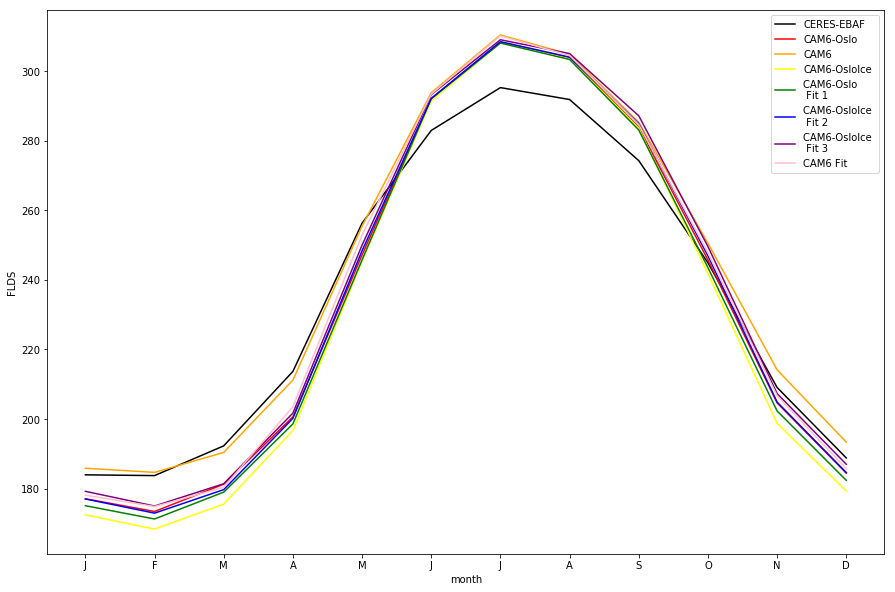

In [57]:
just_legend = allmetric.plot_months_line('FLDS')

In [58]:
to_png(just_legend,'months_all_legend')

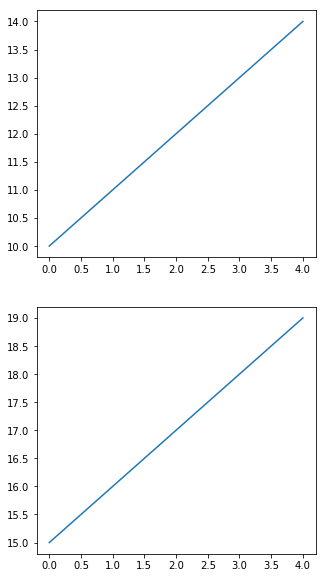

In [4]:
time = [0, 1, 2, 3, 4]
y1 = range(10, 15)
y2 = range(15, 20)

plt.figure(figsize = (5,10))
fig = gridspec.GridSpec(2, 1, height_ratios=[1,1])

x1 = plt.subplot(fig[0])
plt.plot(time, y1)

x2 = plt.subplot(fig[1])
plt.plot(time, y2)

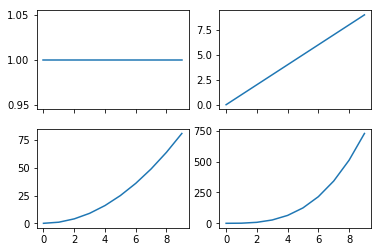

In [35]:
fig, axs = plt.subplots(2, 2, sharex=True)

for i, ax in enumerate(axs.flat):
#      ax = axs[i]
     ax.plot(np.arange(10), np.arange(10)**i)

In [36]:
# https://stackoverflow.com/questions/55419931/can-you-copy-only-some-subplots-to-a-new-figure

import pickle
import io

# pickle the figure, then unpickle it to a new figure
buf = io.BytesIO()
pickle.dump(fig, buf)
buf.seek(0)
fig2=pickle.load(buf)

In [42]:
def show_figure(fig):
    # https://stackoverflow.com/questions/49503869/attributeerror-while-trying-to-load-the-pickled-matplotlib-figure
    # create a dummy figure and use its
    # manager to display "fig"  
    dummy = plt.figure()
    new_manager = dummy.canvas.manager
    new_manager.canvas.figure = fig
    fig.set_canvas(new_manager.canvas)

/opt/conda/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


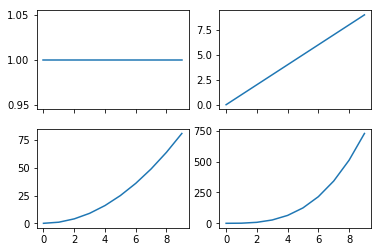

In [41]:
show_figure(fig2)
fig2.show()


In [52]:
fig3 = plt.figure()
fig3.axes.append(axs)

plt.show()

<Figure size 432x288 with 0 Axes>

In [49]:
axs

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9e3255b550>,
      dtype=object)

Remove axes object and send it somewhere else. Dev.
Based on:
https://stackoverflow.com/questions/6309472/matplotlib-can-i-create-axessubplot-objects-then-add-them-to-a-figure-instance

In [55]:
fig1a, ax_a = plt.subplots()
ax_a.plot(range(10))
ax_a.remove()

fig1b, ax_b = plt.subplots()
ax_b.plot(range(10))
ax_b.remove()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [58]:
fig1c = gridspec.GridSpec(2, 1, height_ratios=[1,1])

In [ ]:
fig1d = plt.figure()

In [60]:
fig3 = plt.figure()
ax.figure=fig3
fig3.axes.append(ax_a)
fig3.add_axes(ax_a)

dummy = fig3.add_subplot(111)
ax_a.set_position(dummy.get_position())
dummy.remove()
plt.close(fig1a)

plt.show()

ValueError: The Axes must have been created in the present figure

<Figure size 432x288 with 0 Axes>

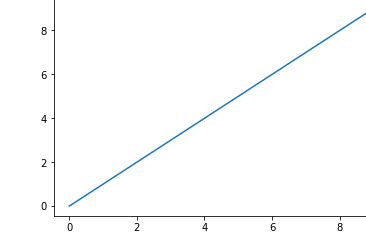

In [70]:
fig1, ax = plt.subplots()
ax.plot(range(10))
ax.remove()

fig2 = plt.figure()
# fig2, axs2 = plt.subplots(nrows=1,ncols=2)

ax.figure=fig2
fig2.axes.append(ax)
fig2.add_axes(ax)

dummy = fig2.add_subplot(111)
ax.set_position(dummy.get_position())
dummy.remove()
plt.close(fig1)

plt.show()

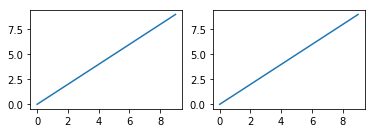

In [76]:
testfig = plt.figure()

axa = testfig.add_subplot(222)
axa.plot(range(10))

axa = testfig.add_subplot(221)
axa.plot(range(10))

In [77]:
fig1c = gridspec.GridSpec(2, 1, height_ratios=[1,1])

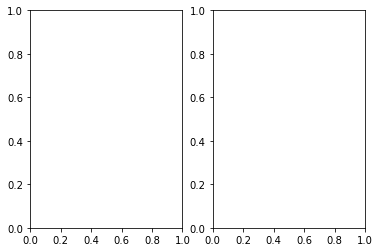

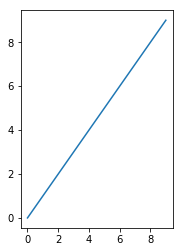

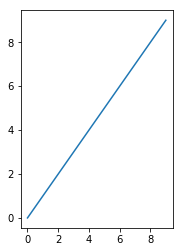

In [106]:
# Create outline with subplots
plts, axs = plt.subplots(nrows=1,ncols=2)

# Get actual axes object from other functions (fake here)
fake1, fax1 = plt.subplots()
fax1.plot(range(10))

fake2, fax2 = plt.subplots()
fax2.plot(range(10))

# fax1.remove()
# dummy = fig2.add_subplot(111)
dummy = axs[0]
fax1.set_position(dummy.get_position())
plts.axes[0] = fax1
# dummy.remove()
# plt.close(fake1)

# fax2.remove()
# # dummy = fig2.add_subplot(111)
dummy = axs[1]
fax2.set_position(dummy.get_position())
plts.axes[1] = fax1

# dummy.remove()
# plt.close(fake2)

ValueError: The Axes must have been created in the present figure

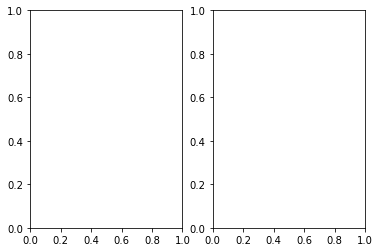

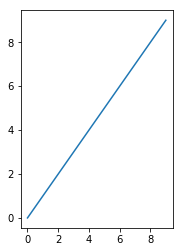

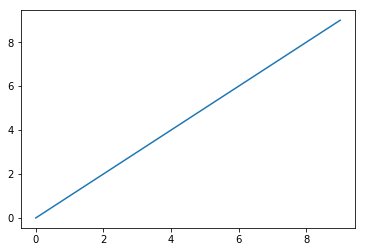

In [107]:
# Create outline with subplots
plts, axs = plt.subplots(nrows=1,ncols=2)

# Get actual axes object from other functions (fake here)
fake1, fax1 = plt.subplots()
fax1.plot(range(10))

fake2, fax2 = plt.subplots()
fax2.plot(range(10))

# fax1.remove()
# dummy = fig2.add_subplot(111)
dummy = axs[0]
fax1.set_position(dummy.get_position())
plts.axes[0] = fax1
# dummy.remove()
# plt.close(fake1)

plts.axes.append(fax1)
plts.add_axes(fax1)

# fax2.remove()
# # dummy = fig2.add_subplot(111)
dummy = axs[1]
fax2.set_position(dummy.get_position())
plts.axes[1] = fax1

# dummy.remove()
# plt.close(fake2)

In [104]:
plts.axes

In [23]:
tokeep=[1,2]
axestokeep=[]

for i,a in enumerate(fig2.axes):
    if not i in(tokeep):
        fig2.delaxes(a)
    else:
        axestokeep.extend([a])

axestokeep[0].change_geometry(1,2,1)
axestokeep[1].change_geometry(1,2,2)

In [29]:
fig2.show()

AttributeError: 'NoneType' object has no attribute 'manager'
Figure.show works only for figures managed by pyplot, normally created by pyplot.figure().

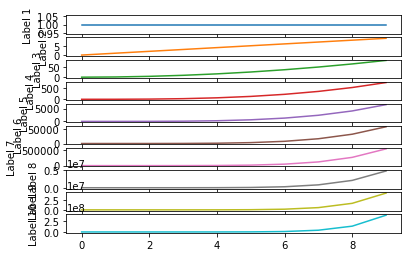

In [31]:
num_rows = 10
num_cols = 1
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
labels = ["Label {}".format(i+1) for i in range(num_rows)]

def myplot(i, ax):
    ax.plot(np.arange(10), np.arange(10)**i, color=colors[i])
    ax.set_ylabel(labels[i])


fig, axs = plt.subplots(num_rows, num_cols, sharex=True)
for i in range(num_rows):
     myplot(i, axs[i])


def on_click(event):
    axes = event.inaxes
    if not axes: return
    inx = list(fig.axes).index(axes)
    fig2 = plt.figure()
    ax = fig2.add_subplot(111)
    myplot(inx, ax)
    fig2.show()

fig.canvas.mpl_connect('button_press_event', on_click)

plt.show()


## SLF curves figure

AxesSubplot(0.125,0.125;0.352273x0.755)


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


AxesSubplot(0.547727,0.125;0.352273x0.755)


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Text(0.85,0.8,'b.')

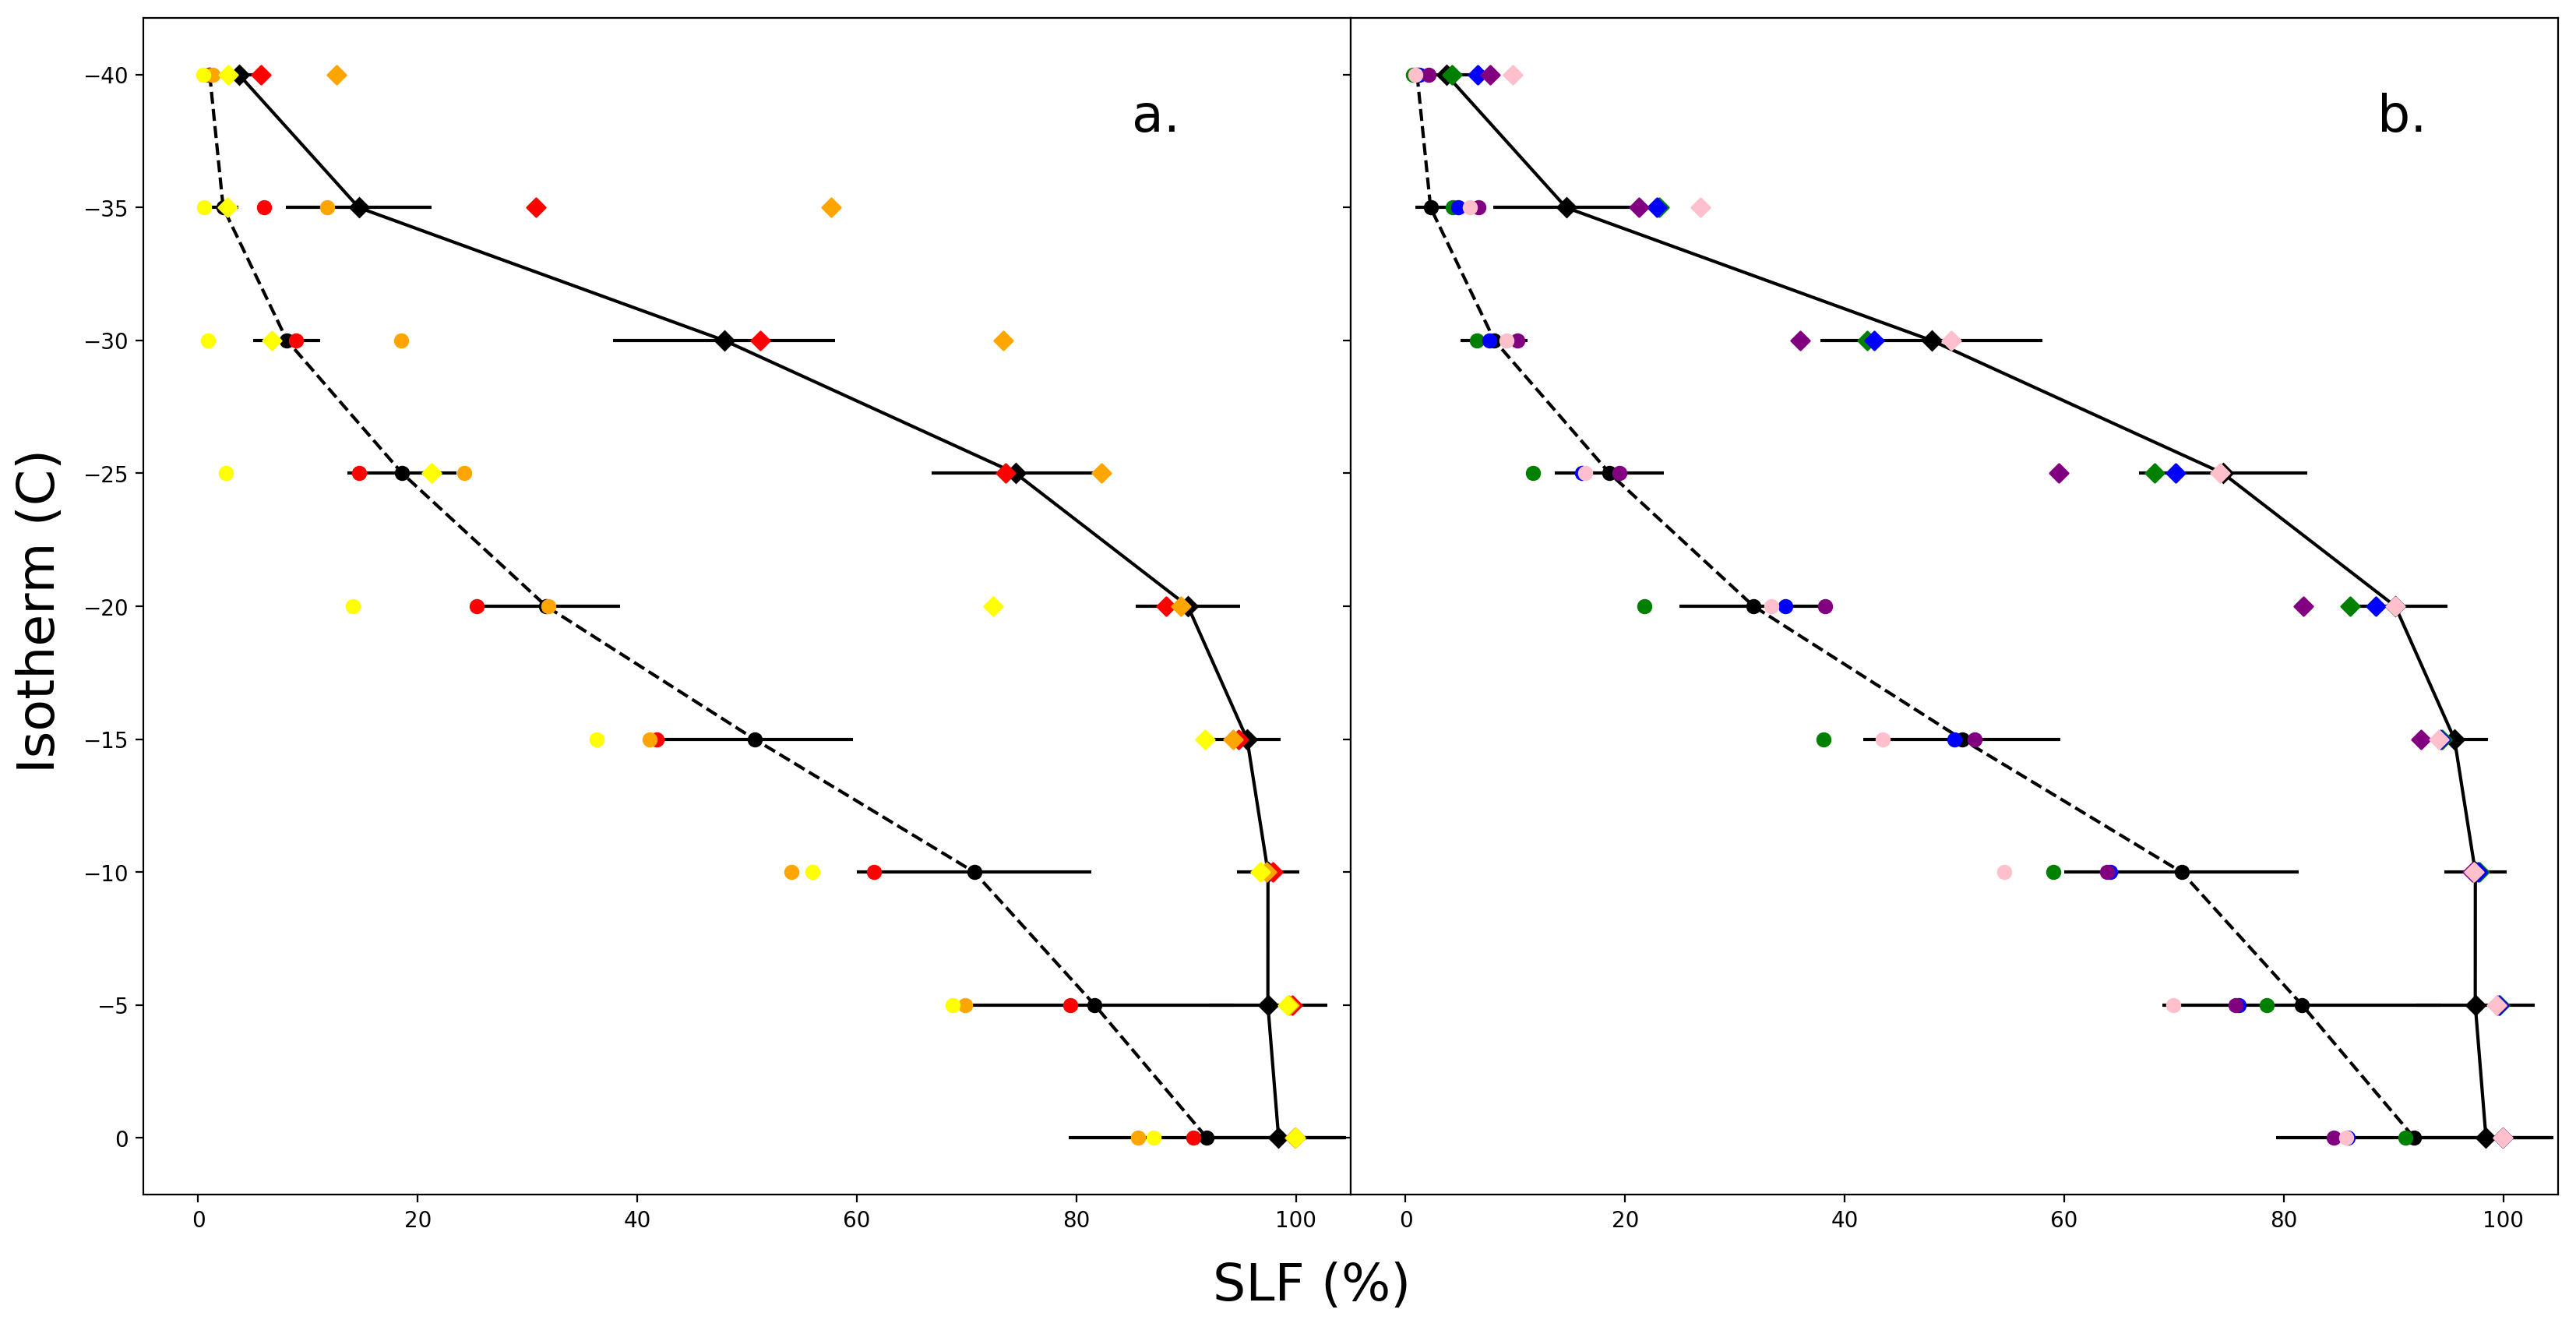

In [5]:
fitmetric_slf.colors = fitmetric_slf.colors[3:]

fig,axs = plt.subplots(nrows=1,ncols=2)#,sharey=True)
fig.set_figheight(10)
fig.set_figwidth(20)
fig.set_dpi(200)

axs[0].invert_yaxis()
o = basemetric_slf.plot_isos_all(ax=axs[0])

# axs[0].invert_yaxis()
# o = basemetric_slf.plot_isos_all(ax=axs[0])
axs[1].invert_yaxis()
oo = fitmetric_slf.plot_isos_all(ax=axs[1])

fig.subplots_adjust(wspace=0.0)

axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[1].set_ylabel('')
axs[1].set_xlabel('')
axs[0].set_title('')
axs[1].set_title('')
# axs[1].set_yticks(np.arange(-40,0,5),' ')
# axs[1].get_yaxis().set_ticks([])
axs[1].set_yticklabels([])

fig.text(0.1, 0.5, 'Isotherm (C)', va='bottom', ha='center', rotation='vertical', 
         rotation_mode='anchor', fontsize=24)
fig.text(0.5, 0.05, 'SLF (%)', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)

# fig.text(0.15, 0.2, 'a.', va='bottom', ha='center', rotation='horizontal', 
#          rotation_mode='anchor', fontsize=24)
# fig.text(0.55, 0.2, 'b.', va='bottom', ha='center', rotation='horizontal', 
#          rotation_mode='anchor', fontsize=24)

fig.text(0.45, 0.8, 'a.', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)
fig.text(0.85, 0.8, 'b.', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)

In [7]:
to_png(fig,"combined_slfcurves")

/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


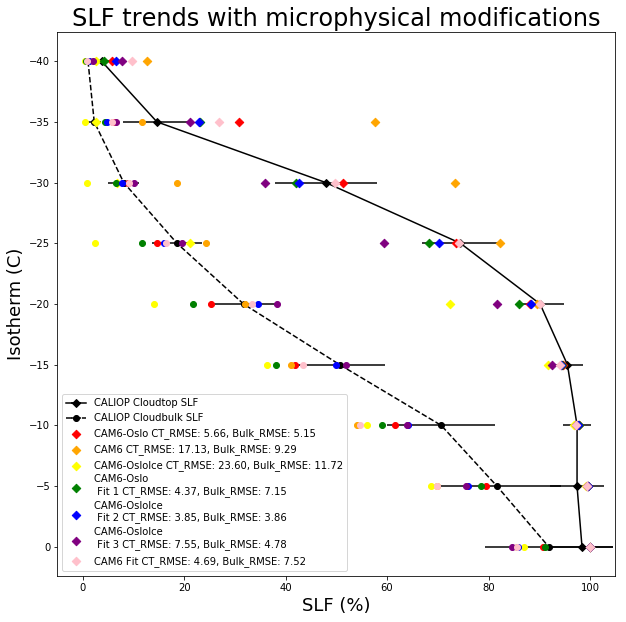

In [13]:
forlegend = allmetric_slf.plot_isos_all()

In [14]:
to_png(forlegend,"all_legend")

## Radiative Biases Figure(s)

Text(0.55,0.78,'b.')

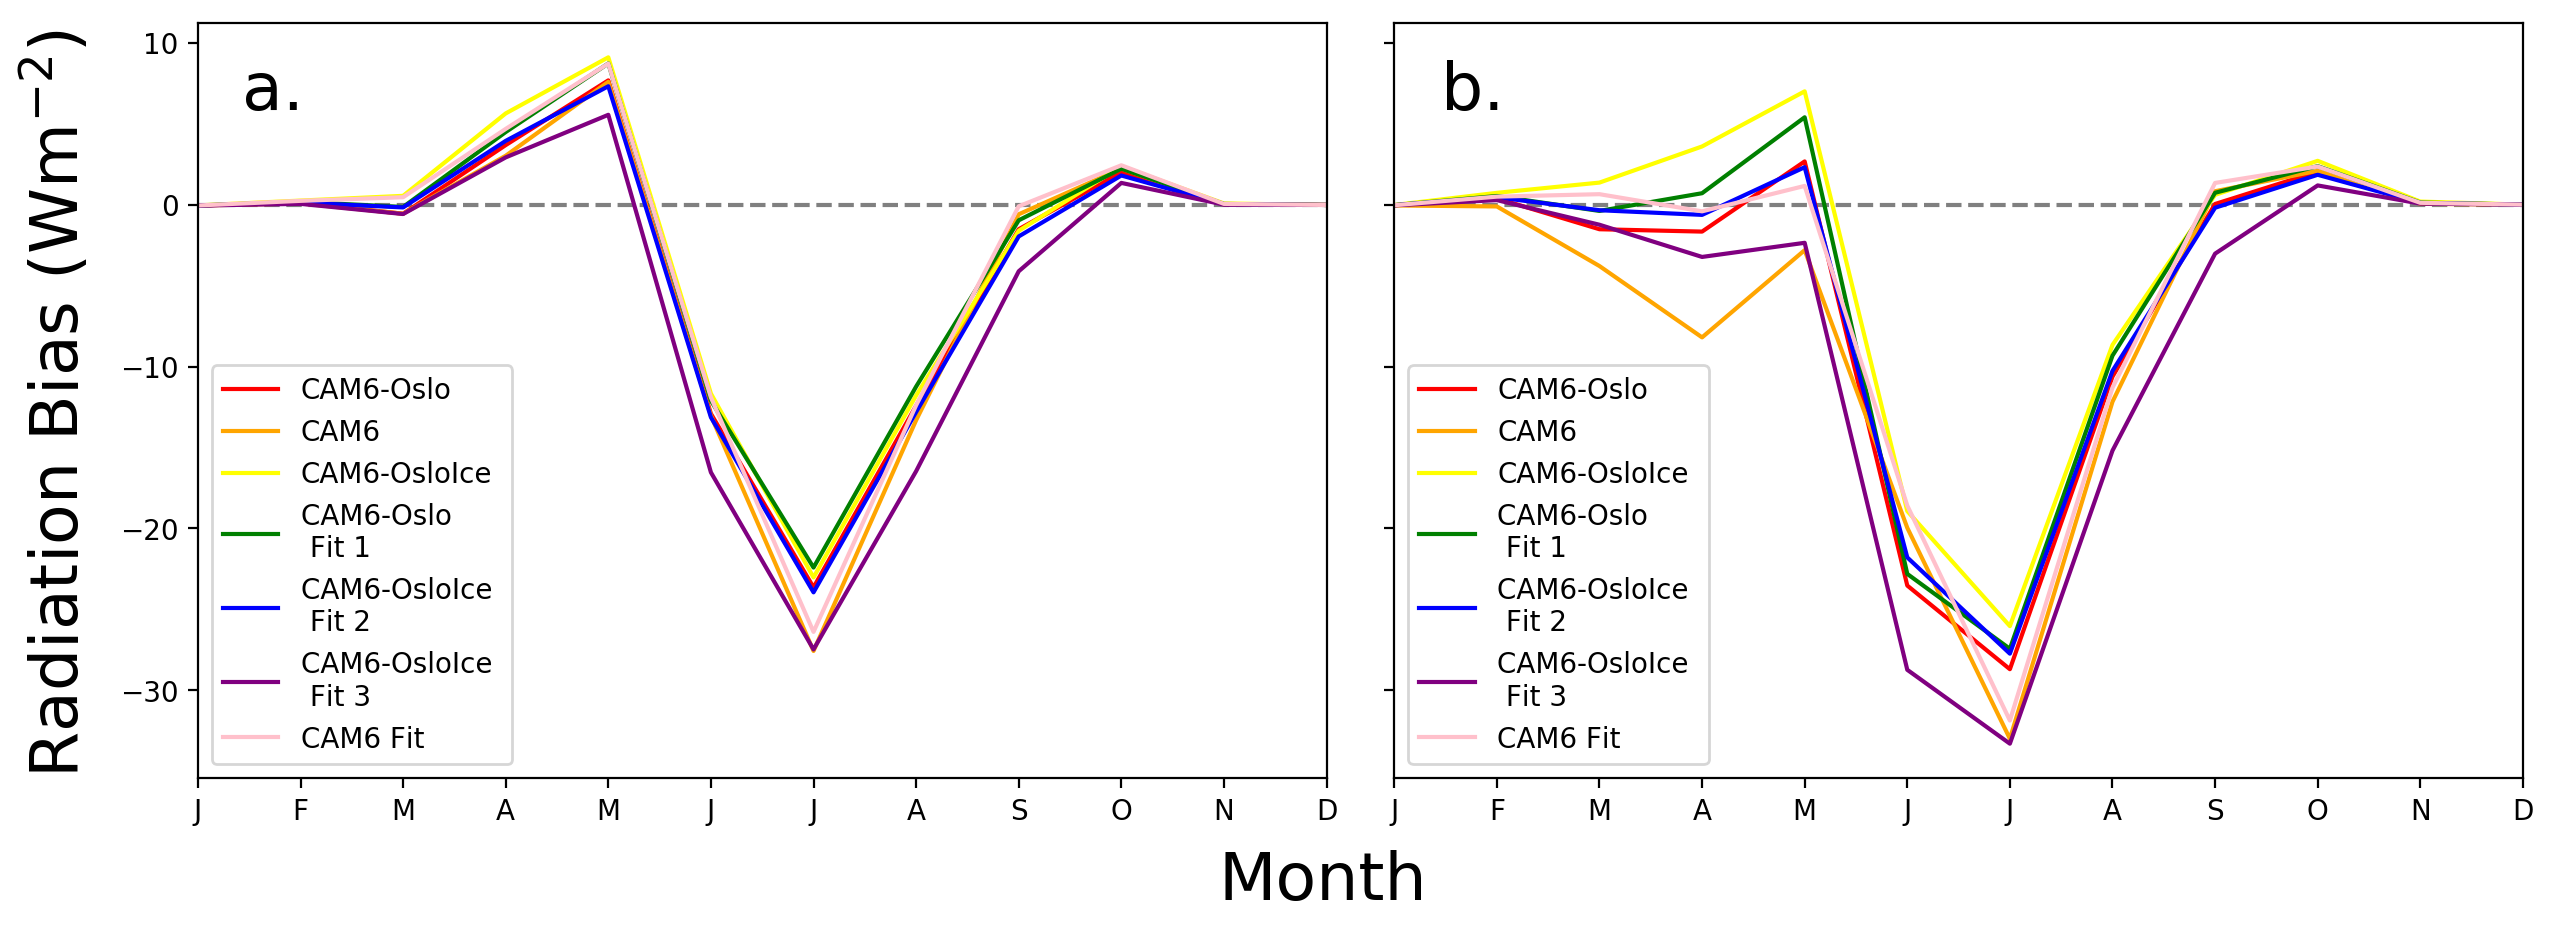

In [17]:
fig,axs = plt.subplots(nrows=1,ncols=2,sharey='row')
fig.set_figheight(5)
fig.set_figwidth(15)
fig.set_dpi(200)

axs = axs.flat
fig.subplots_adjust(wspace=0.06)

allmetric.plot_months_line('SWCF',ax=axs[0], bias=True)
allmetric.plot_months_line('FSDS',ax=axs[1], bias=True)
# allmetric.plot_months_line('LWCF',ax=axs[2], bias=False)
# allmetric.plot_months_line('FLDS',ax=axs[3], bias=False)


# Mute existing labels and draw zero lines
for i in axs:
    mute_ax(i)
    i.hlines(0,1,12, linestyle='dashed',color='gray')
    i.set_xlim(1,12)
# axs[0].set_ylim(-35,10)
# axs[1].set_ylim(-35,10)
# axs[-1].set_ylim(150,325)
# axs[1].set_yticklabels([])

# Trying Latex formatting
# plt.rc('text', usetex=False)
# plt.rc('font', family='serif')

# Re-label
fig.text(0.09, 0.5, r'Radiation Bias (Wm$^{-2}$)', va='bottom', ha='center', rotation='vertical', 
         rotation_mode='anchor', fontsize=24)
fig.text(0.5, -0.01, 'Month', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)

fig.text(0.15, 0.78, 'a.', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)
fig.text(0.55, 0.78, 'b.', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)
# fig.text(0.15, 0.42, 'c.', va='bottom', ha='center', rotation='horizontal', 
#          rotation_mode='anchor', fontsize=24)
# fig.text(0.55, 0.42, 'd.', va='bottom', ha='center', rotation='horizontal', 
#          rotation_mode='anchor', fontsize=24)

In [19]:
to_png(fig,'sw_rad_biases')

Text(0.57,0.44,'d. LW CRE')

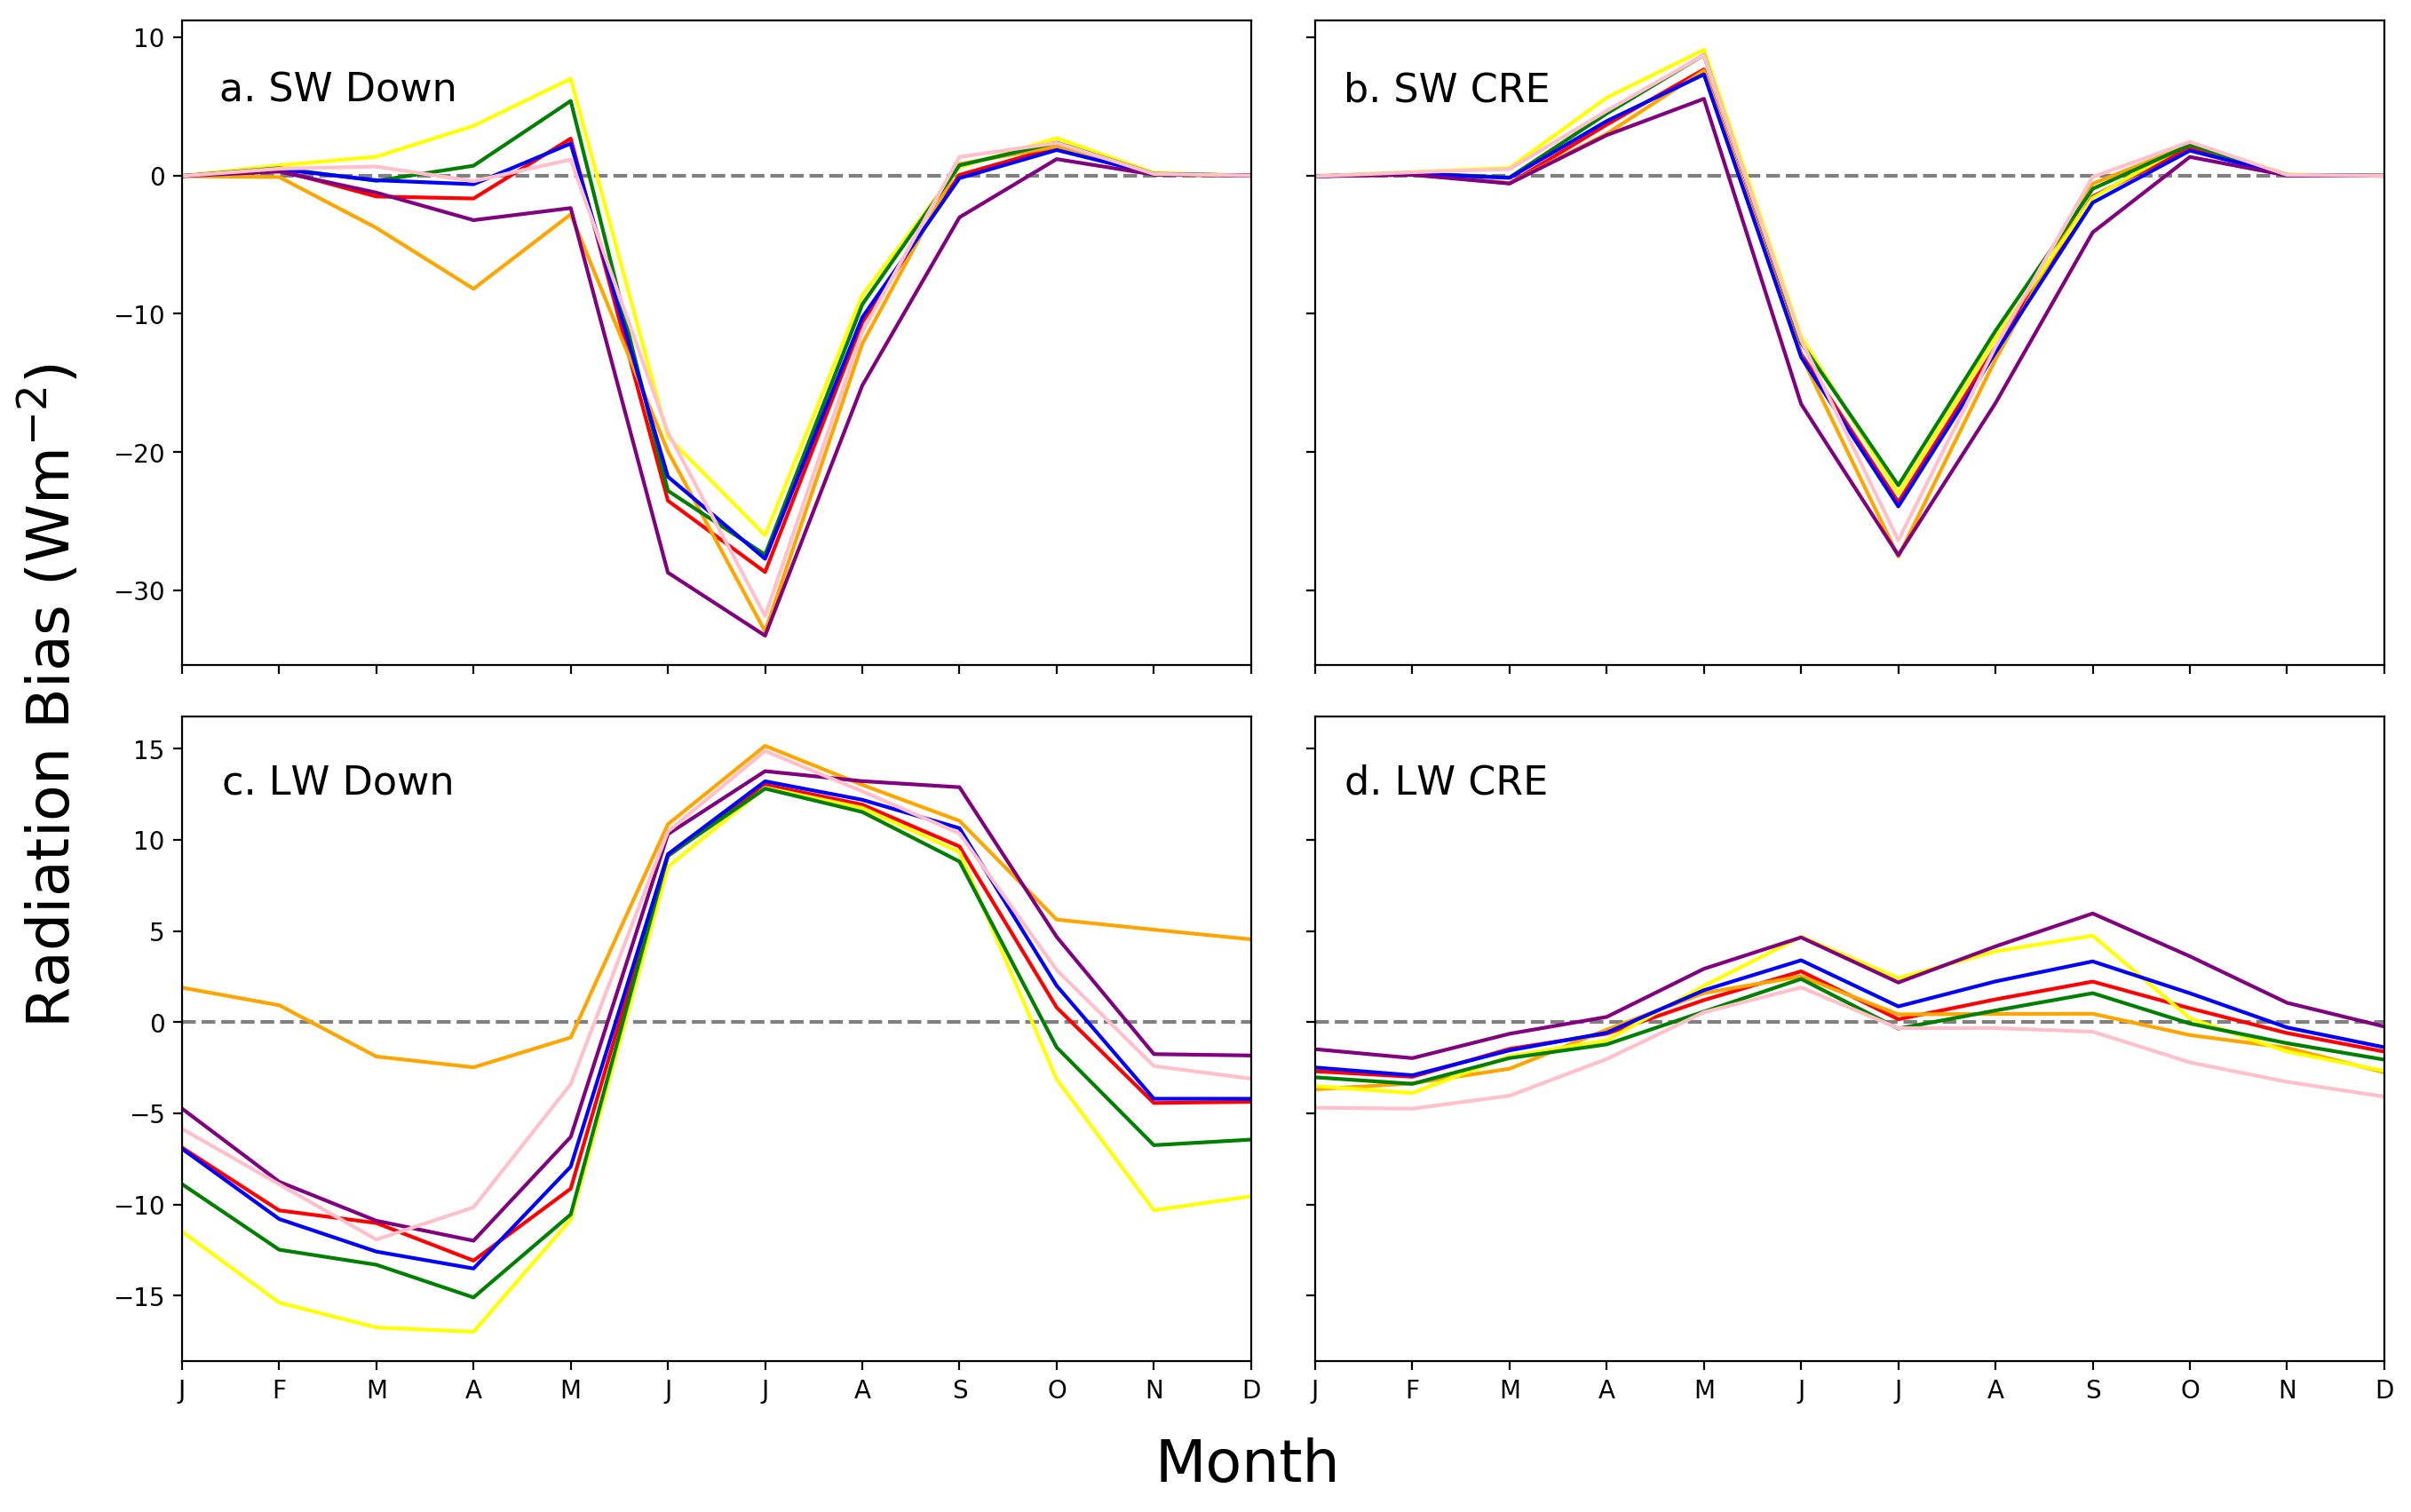

In [53]:
fig,axs = plt.subplots(nrows=2,ncols=2,sharey='row',sharex='col')
fig.set_figheight(10)
fig.set_figwidth(16)
fig.set_dpi(200)

axs = axs.flat
fig.subplots_adjust(wspace=0.06,hspace=0.08)

allmetric.plot_months_line('FSDS',ax=axs[0], bias=True)
allmetric.plot_months_line('SWCF',ax=axs[1], bias=True)
allmetric.plot_months_line('FLDS',ax=axs[2], bias=True)
allmetric.plot_months_line('LWCF',ax=axs[3], bias=True)


# Mute existing labels and draw zero lines
for i in axs:
    mute_ax(i)
    i.hlines(0,1,12, linestyle='dashed',color='gray')
    i.set_xlim(1,12)
# axs[0].set_ylim(-35,10)
# axs[1].set_ylim(-35,10)
# axs[-1].set_ylim(150,325)
# axs[1].set_yticklabels([])

# Trying Latex formatting
# plt.rc('text', usetex=False)
# plt.rc('font', family='serif')

# Re-label
fig.text(0.09, 0.5, r'Radiation Bias (Wm$^{-2}$)', va='bottom', ha='center', rotation='vertical', 
         rotation_mode='anchor', fontsize=24)
fig.text(0.5, 0.05, 'Month', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)

fig.text(0.18, 0.83, 'a. SW Down', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=16)
fig.text(0.57, 0.83, 'b. SW CRE', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=16)
fig.text(0.18, 0.44, 'c. LW Down', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=16)
fig.text(0.57, 0.44, 'd. LW CRE', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=16)

In [55]:
to_png(fig,'rad_biases_labelled')

Text(0.5,0.05,'Month')

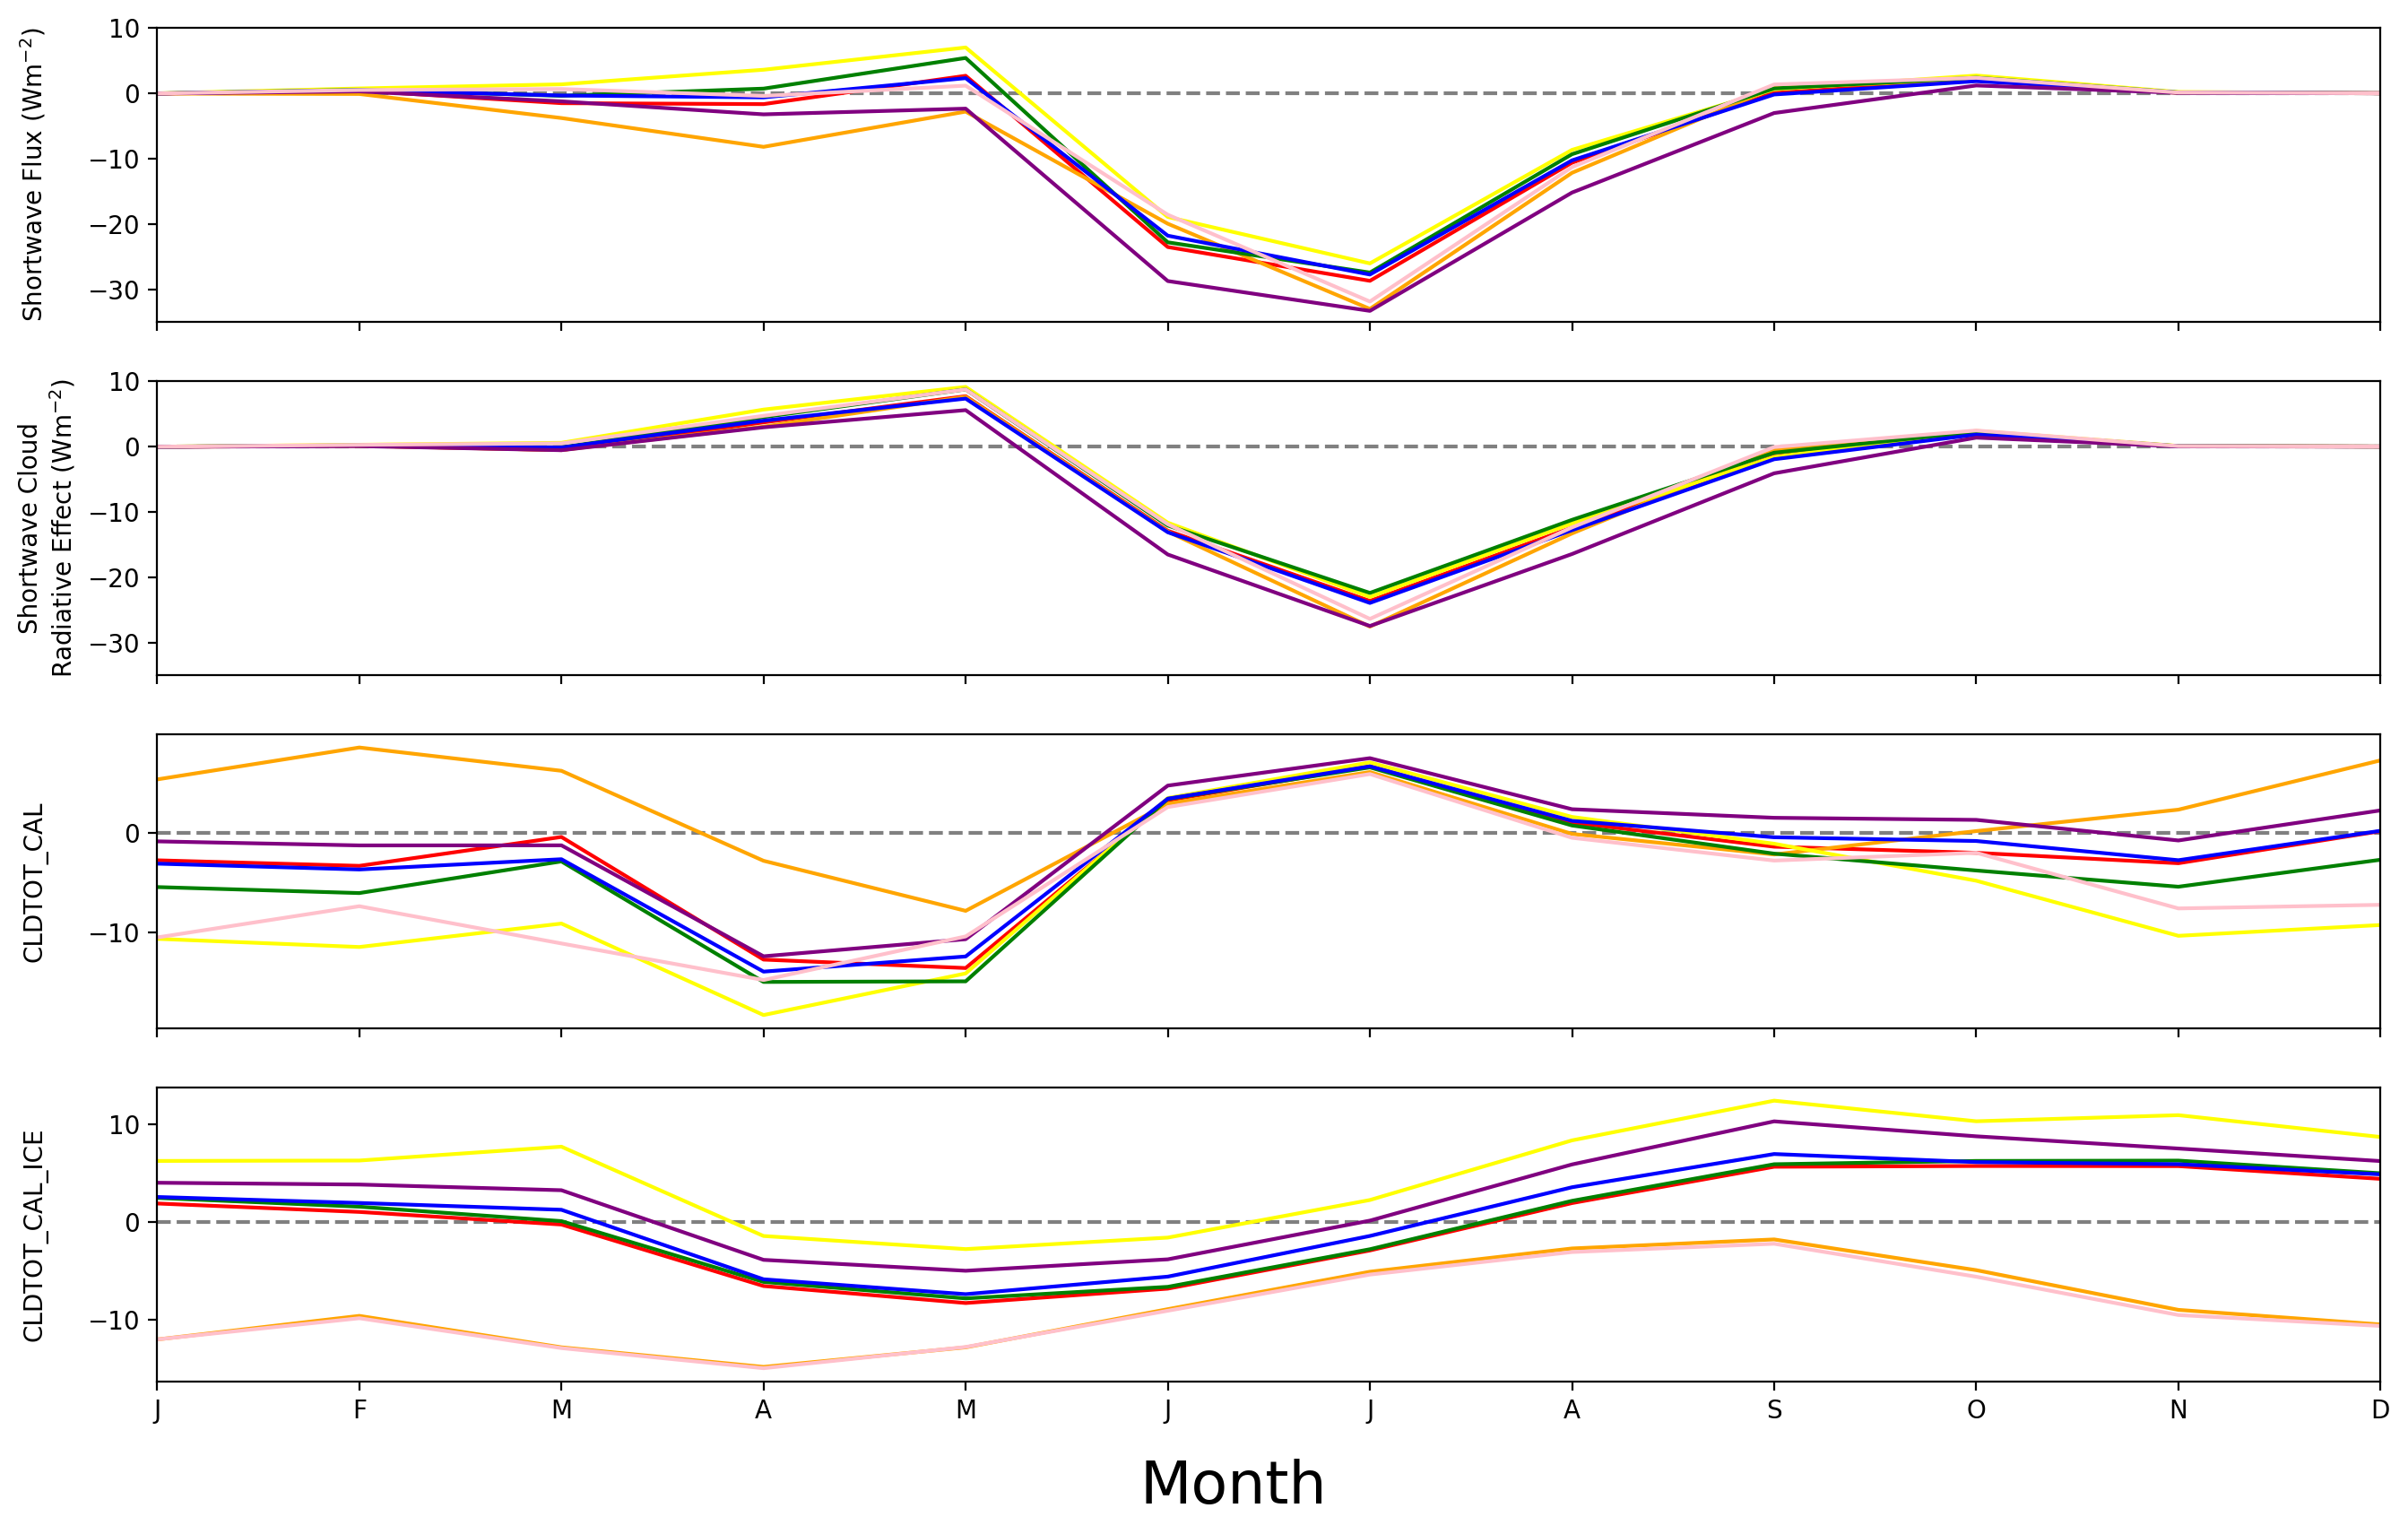

In [58]:
fig,axs = plt.subplots(nrows=4,ncols=1,sharex=True)#,sharey='row')
fig.set_figheight(10)
fig.set_figwidth(16)
fig.set_dpi(200)

axs = axs.flat
fig.subplots_adjust(wspace=0.06)

allmetric.plot_months_line('FSDS',ax=axs[0], bias=True)
allmetric.plot_months_line('SWCF',ax=axs[1], bias=True)
allmetric.plot_months_line('CLDTOT_CAL',ax=axs[2], bias=True)
allmetric.plot_months_line('CLDTOT_CAL_ICE',ax=axs[3], bias=True)


# Mute existing labels and draw zero lines
for i in axs:
    mute_ax(i)
    i.hlines(0,1,12, linestyle='dashed',color='gray')
    i.set_xlim(1,12)
axs[0].set_ylim(-35,10)
axs[1].set_ylim(-35,10)
# axs[-1].set_ylim(150,325)
# axs[1].set_yticklabels([])
axs[0].set_ylabel(r'Shortwave Flux (Wm$^{-2}$)' + "\n")
axs[1].set_ylabel(r'Shortwave Cloud' + "\n" + 'Radiative Effect (Wm$^{-2}$)')
axs[2].set_ylabel(r'CLDTOT_CAL' + "\n")
axs[3].set_ylabel(r'CLDTOT_CAL_ICE' + "\n")
# axs[2].set_ylabel(r'Longwave Flux (Wm$^{-2}$)' + "\n")
# axs[3].set_ylabel(r'Longwave Cloud' + "\n" + 'Radiative Effect (Wm$^{-2}$)')
# Trying Latex formatting
# plt.rc('text', usetex=False)
# plt.rc('font', family='serif')

# Re-label
# fig.text(0.1, 0.5, r'Radiation Bias (Wm$^{-2}$)', va='bottom', ha='center', rotation='vertical', 
#          rotation_mode='anchor', fontsize=24)
fig.text(0.5, 0.05, 'Month', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)

# fig.text(0.15, 0.83, 'a.', va='bottom', ha='center', rotation='horizontal', 
#          rotation_mode='anchor', fontsize=24)
# fig.text(0.55, 0.83, 'b.', va='bottom', ha='center', rotation='horizontal', 
#          rotation_mode='anchor', fontsize=24)
# fig.text(0.15, 0.42, 'c.', va='bottom', ha='center', rotation='horizontal', 
#          rotation_mode='anchor', fontsize=24)
# fig.text(0.55, 0.42, 'd.', va='bottom', ha='center', rotation='horizontal', 
#          rotation_mode='anchor', fontsize=24)

Text(0.5,0.05,'Month')

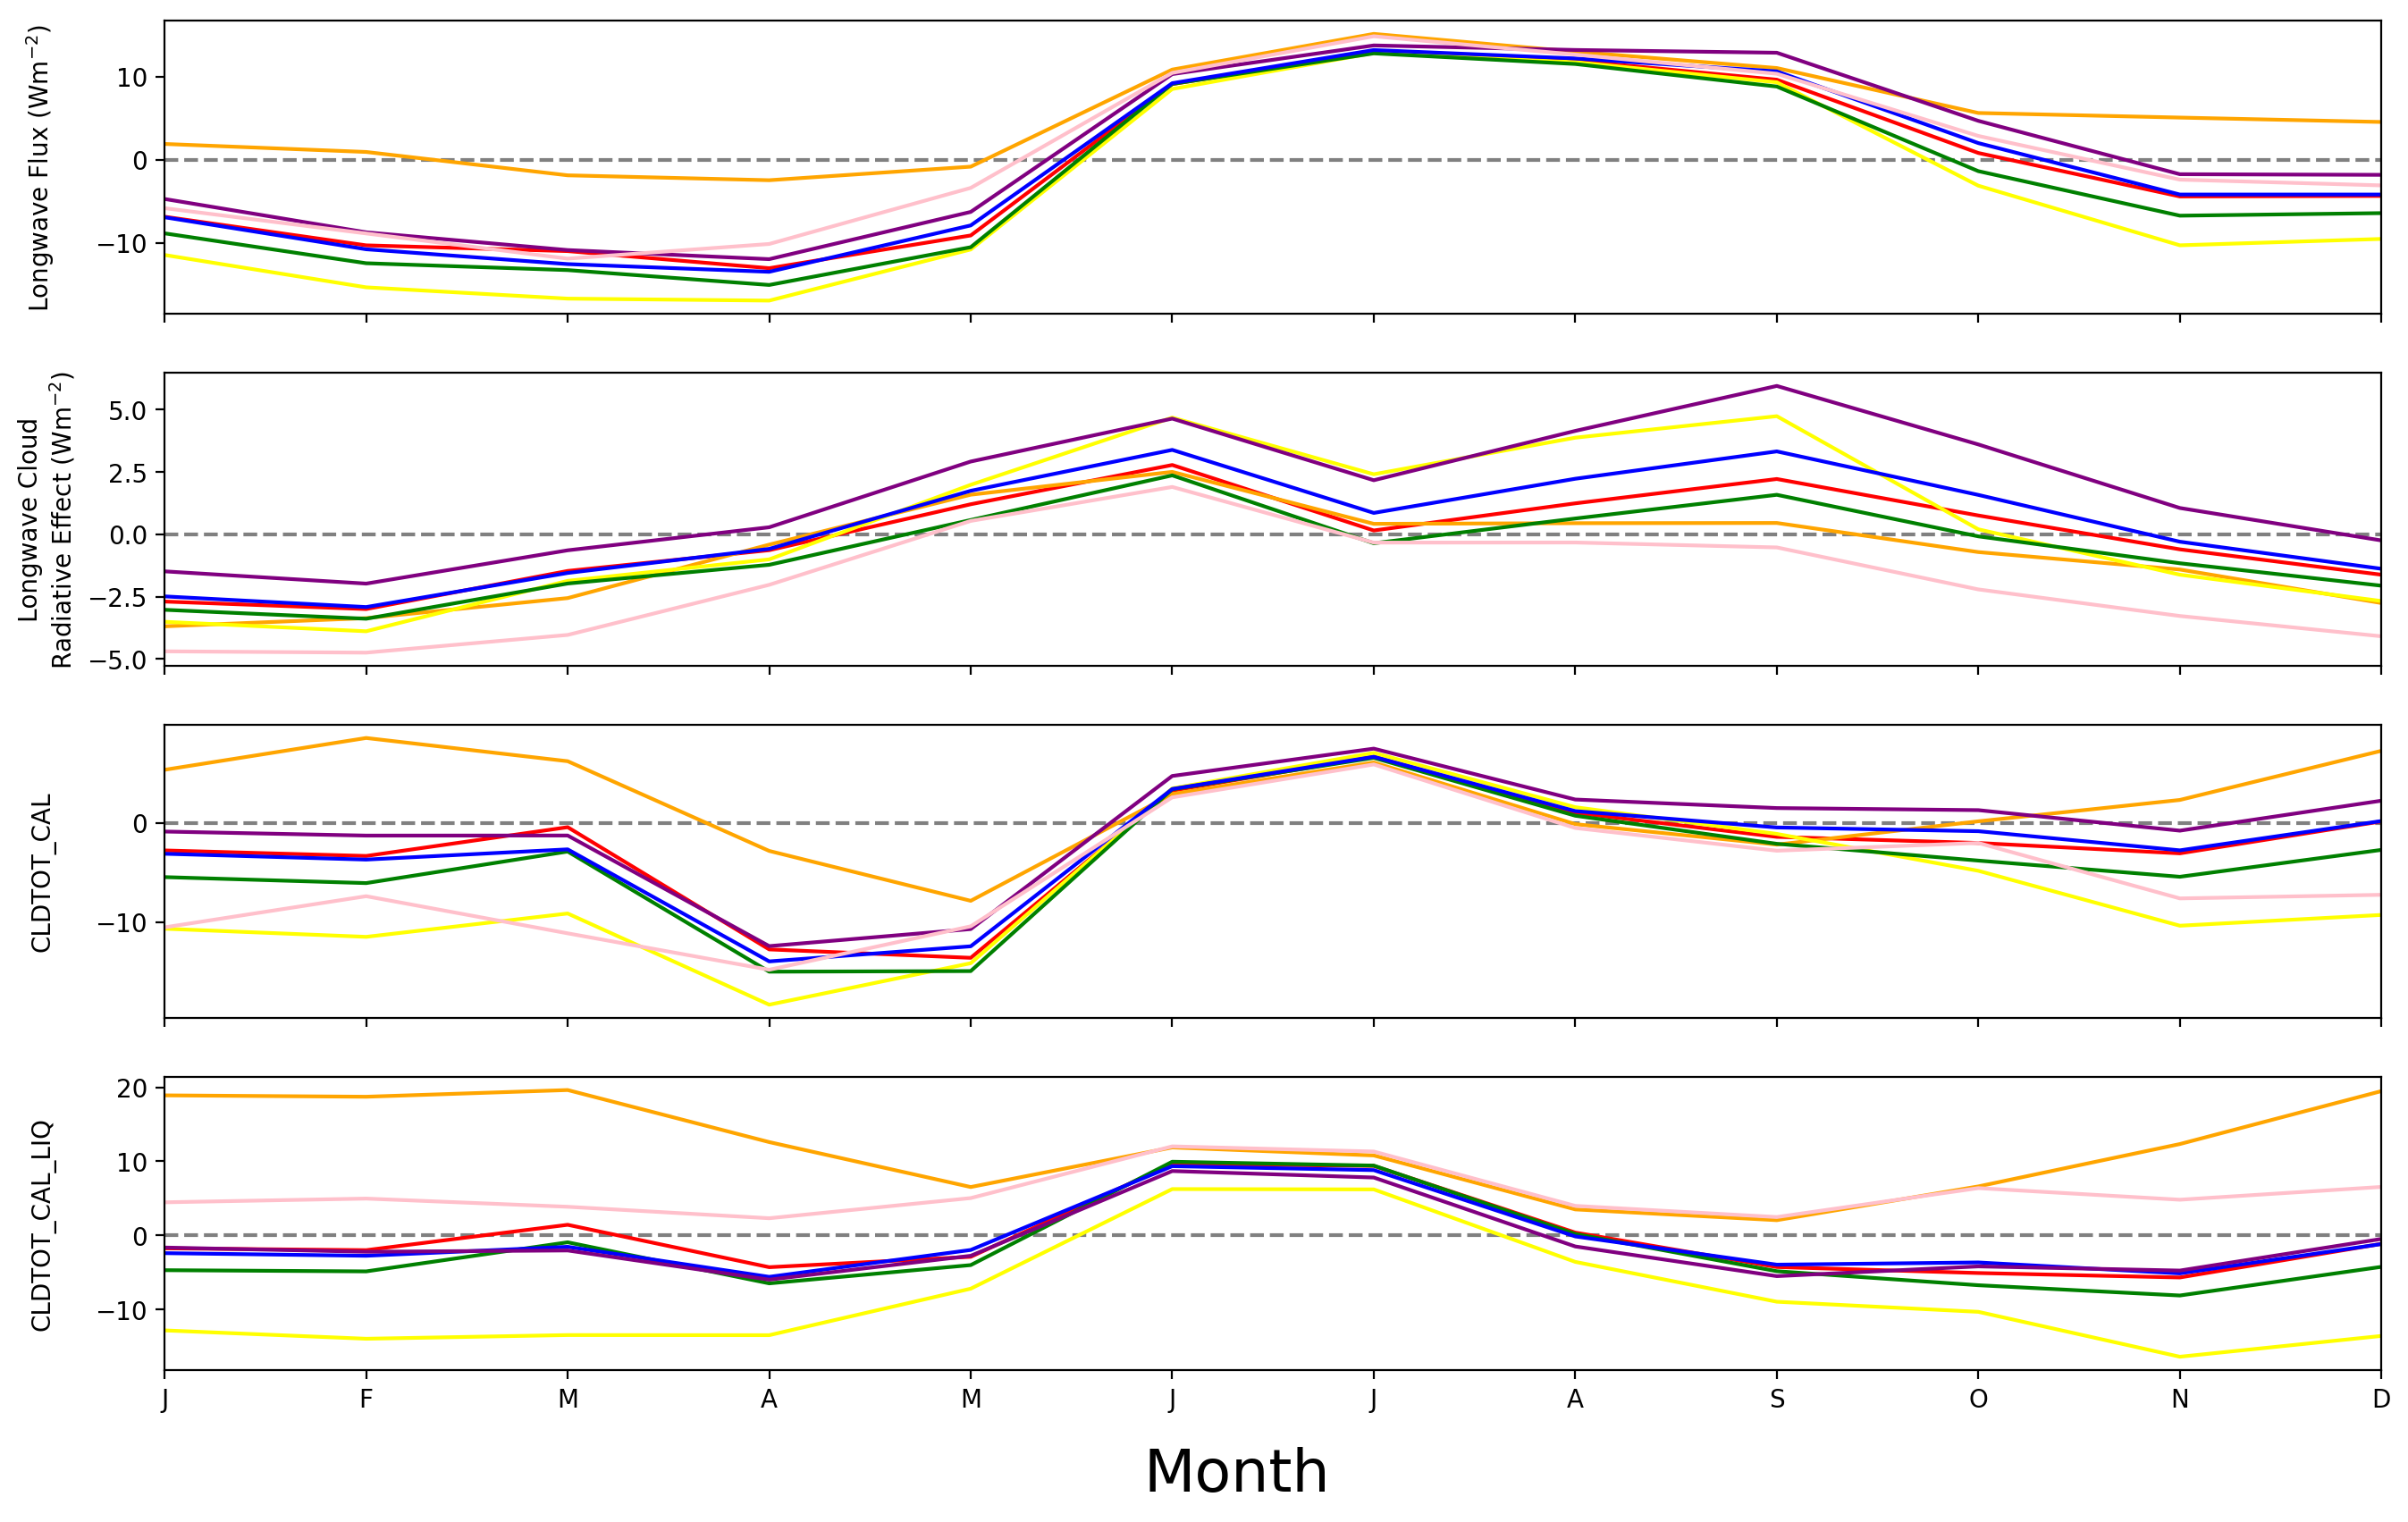

In [60]:
fig,axs = plt.subplots(nrows=4,ncols=1,sharex=True)#,sharey='row')
fig.set_figheight(10)
fig.set_figwidth(16)
fig.set_dpi(200)

axs = axs.flat
fig.subplots_adjust(wspace=0.06)

allmetric.plot_months_line('FLDS',ax=axs[0], bias=True)
allmetric.plot_months_line('LWCF',ax=axs[1], bias=True)
allmetric.plot_months_line('CLDTOT_CAL',ax=axs[2], bias=True)
allmetric.plot_months_line('CLDTOT_CAL_LIQ',ax=axs[3], bias=True)


# Mute existing labels and draw zero lines
for i in axs:
    mute_ax(i)
    i.hlines(0,1,12, linestyle='dashed',color='gray')
    i.set_xlim(1,12)
# axs[0].set_ylim(-35,10)
# axs[1].set_ylim(-35,10)
# axs[-1].set_ylim(150,325)
# axs[1].set_yticklabels([])
axs[0].set_ylabel(r'Longwave Flux (Wm$^{-2}$)' + "\n")
axs[1].set_ylabel(r'Longwave Cloud' + "\n" + 'Radiative Effect (Wm$^{-2}$)')
axs[2].set_ylabel(r'CLDTOT_CAL' + "\n")
axs[3].set_ylabel(r'CLDTOT_CAL_LIQ' + "\n")
# axs[2].set_ylabel(r'Longwave Flux (Wm$^{-2}$)' + "\n")
# axs[3].set_ylabel(r'Longwave Cloud' + "\n" + 'Radiative Effect (Wm$^{-2}$)')
# Trying Latex formatting
# plt.rc('text', usetex=False)
# plt.rc('font', family='serif')

# Re-label
# fig.text(0.1, 0.5, r'Radiation Bias (Wm$^{-2}$)', va='bottom', ha='center', rotation='vertical', 
#          rotation_mode='anchor', fontsize=24)
fig.text(0.5, 0.05, 'Month', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)

# fig.text(0.15, 0.83, 'a.', va='bottom', ha='center', rotation='horizontal', 
#          rotation_mode='anchor', fontsize=24)
# fig.text(0.55, 0.83, 'b.', va='bottom', ha='center', rotation='horizontal', 
#          rotation_mode='anchor', fontsize=24)
# fig.text(0.15, 0.42, 'c.', va='bottom', ha='center', rotation='horizontal', 
#          rotation_mode='anchor', fontsize=24)
# fig.text(0.55, 0.42, 'd.', va='bottom', ha='center', rotation='horizontal', 
#          rotation_mode='anchor', fontsize=24)

In [63]:
to_png(fig,'surface_and_cloud_biases')

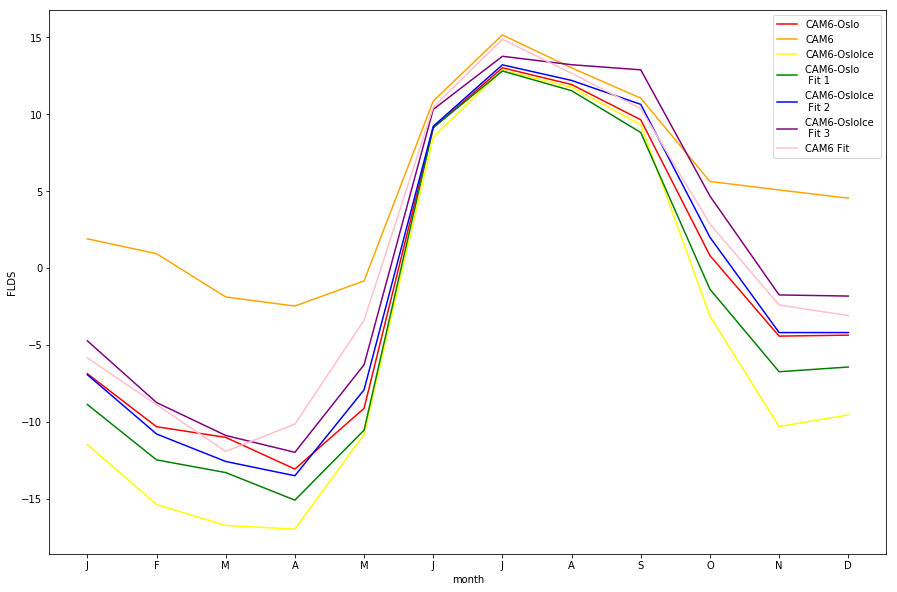

In [66]:
just_legend = allmetric.plot_months_line('FLDS', bias=True)

In [67]:
to_png(just_legend,'months_all_legend')

In [62]:
allmetric.ceres_data['SWCF']

<xarray.DataArray 'SWCF' (time: 48, lat: 96, lon: 144)>
[663552 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2009-06-15 2009-07-15 ... 2013-05-15
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
Attributes:
    standard_name:  TOA CRE Shortwave Flux
    long_name:      Top of The Atmosphere Cloud Radiative Effects Shortwave F...
    units:          W m-2
    CF_name:        toa_shortwave_cloud_radiative_effect
    comment:        Calculated as all-sky flux minus clear-sky (for total reg...
    valid_min:           -400.000
    valid_max:            100.000